<a href="https://colab.research.google.com/github/AAazieyati/Attendance-Management-System-Using-Face-Recognition-GROUPB/blob/main/LatestanimalsClassify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing libraries
import tensorflow 
import keras  
import os
import glob
from skimage import io
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import datasets, layers, models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import splitfolders

datasets = '/content/drive/MyDrive/AnimalsData'
input_folder = datasets

splitfolders.ratio(input_folder, output="AnimalsDataset", seed=42, ratio=(.7,.2,.1),
                   group_prefix=None)

splitfolders.fixed(input_folder, output="AnimalsDataset", seed=42, fixed=(35,20),
                  oversample=False, group_prefix=None)


Copying files: 2000 files [00:42, 47.11 files/s] 
Copying files: 2000 files [00:07, 267.20 files/s]


In [ ]:
img_height, img_width = 224, 224
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    "AnimalsDataset/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "AnimalsDataset/val",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "AnimalsDataset/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 1890 files belonging to 2 classes.
Found 470 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


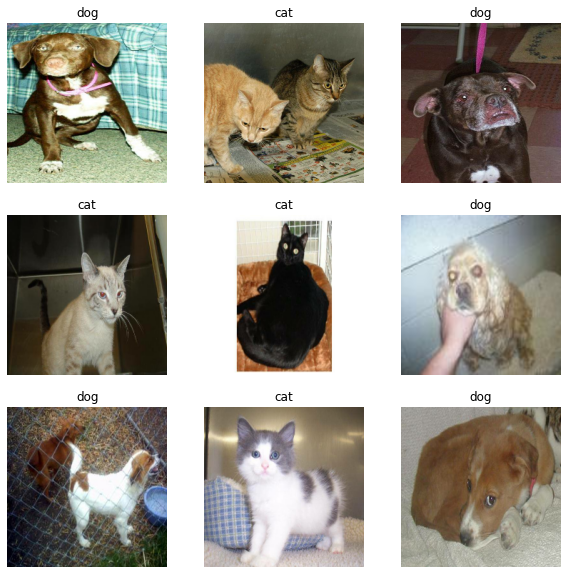

In [ ]:
class_names = ["cat", "dog"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = len(class_names)
model = tf.keras.Sequential(
    [
        layers.Rescaling(1./255),
        layers.Conv2D(16, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32,3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(num_classes)  # all connection layer with 5 classes
    ]
)


In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy'],
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
60/60 [==============================] - 105s 2s/step - loss: 0.9297 - accuracy: 0.5032 - val_loss: 0.6302 - val_accuracy: 0.6915
Epoch 2/10
60/60 [==============================] - 105s 2s/step - loss: 0.6220 - accuracy: 0.6524 - val_loss: 0.6005 - val_accuracy: 0.6362
Epoch 3/10
60/60 [==============================] - 105s 2s/step - loss: 0.6061 - accuracy: 0.6847 - val_loss: 0.5083 - val_accuracy: 0.7872
Epoch 4/10
60/60 [==============================] - 103s 2s/step - loss: 0.4896 - accuracy: 0.7608 - val_loss: 0.4138 - val_accuracy: 0.7979
Epoch 5/10
60/60 [==============================] - 114s 2s/step - loss: 0.3655 - accuracy: 0.8370 - val_loss: 0.2959 - val_accuracy: 0.8553
Epoch 6/10
60/60 [==============================] - 101s 2s/step - loss: 0.2602 - accuracy: 0.8942 - val_loss: 0.2169 - val_accuracy: 0.9106
Epoch 7/10
60/60 [==============================] - 105s 2s/step - loss: 0.1384 - accuracy: 0.9471 - val_loss: 0.2064 - val_accuracy: 0.9404
Epoch 8/10
60

In [ ]:
model.evaluate(test_ds)

7/7 [==============================] - 3s 391ms/step - loss: 0.9271 - accuracy: 0.8100


[0.9270956516265869, 0.8100000023841858]

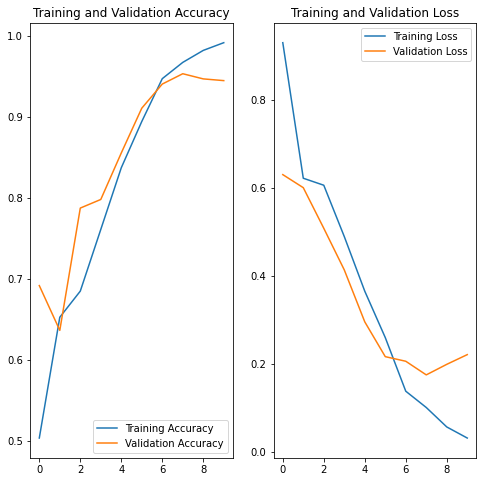

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

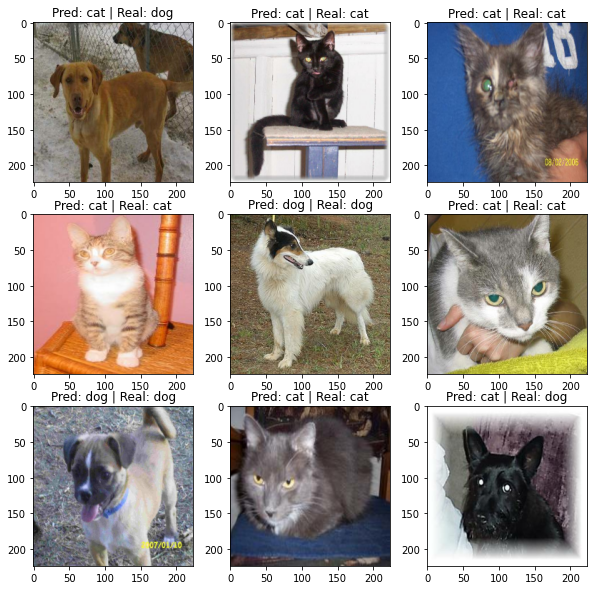

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
# Data augmentation
data_augmentation = keras.Sequential(
  [
        layers.RandomFlip("horizontal",
                          input_shape=(img_height,img_width, 3)),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.5),
  ]
)

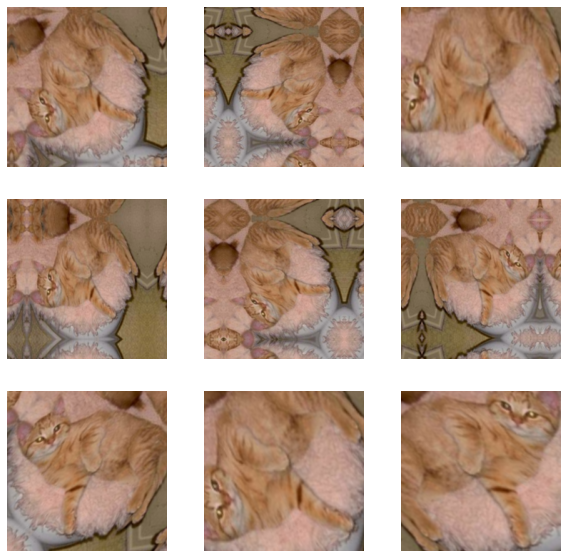

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
# adding dropout

model = tf.keras.Sequential(
    [
        data_augmentation,
        layers.Rescaling(1./255),
        layers.Conv2D(16, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(512, activation='relu'), # fully connected layer 
        layers.Dense(num_classes, name="output")   #output layer with 5 classes
    ]
)

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy'],
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 20
)

Epoch 1/20
60/60 [==============================] - 131s 2s/step - loss: 0.5874 - accuracy: 0.6772 - val_loss: 0.5128 - val_accuracy: 0.7532
Epoch 2/20
60/60 [==============================] - 120s 2s/step - loss: 0.5964 - accuracy: 0.6767 - val_loss: 0.5167 - val_accuracy: 0.7319
Epoch 3/20
60/60 [==============================] - 120s 2s/step - loss: 0.6422 - accuracy: 0.6328 - val_loss: 0.5815 - val_accuracy: 0.7213
Epoch 4/20
60/60 [==============================] - 131s 2s/step - loss: 0.6385 - accuracy: 0.6333 - val_loss: 0.5688 - val_accuracy: 0.7170
Epoch 5/20
60/60 [==============================] - 117s 2s/step - loss: 0.6075 - accuracy: 0.6804 - val_loss: 0.5901 - val_accuracy: 0.6830
Epoch 6/20
60/60 [==============================] - 118s 2s/step - loss: 0.6213 - accuracy: 0.6534 - val_loss: 0.5553 - val_accuracy: 0.7213
Epoch 7/20
60/60 [==============================] - 117s 2s/step - loss: 0.5960 - accuracy: 0.6810 - val_loss: 0.5641 - val_accuracy: 0.7085
Epoch 8/20
60

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(test_ds)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)